# 통계적 가설검정

## 통계적 가설검정이란?
: 모집단의 모수에 관하여 두 가지 가설을 세우고, 표본으로부터 계산되는 통계량을 이용해 어떤 가설이 옳은지 판단하는 통계적 방법.

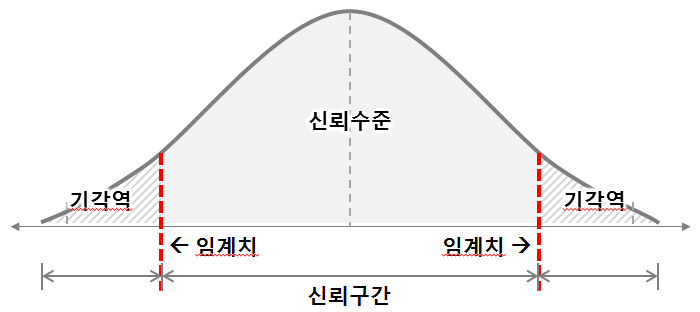

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)
Image("가설검정.png")

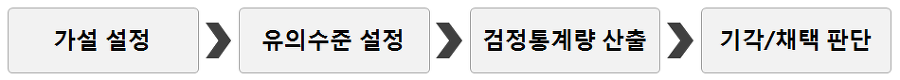

In [2]:
Image("가설검정의 흐름.png")

## 용어정리

#### 귀무가설(H0)과 대립가설(H1)
   * 귀무가설(H0) : 어떠한 차이나 효과가 없다. 라고 설명되는 가설, 기존의 입장.
   * 대립가설(H1) : 어떠한 차이나 효과가 있다. 라고 설명되는 가설, 기존과 상반됨.

#### 신뢰수준
 : 가설을 검정할 때 얼마나 정밀하게 검정할 것인지 결정하는 수준,
   보통 사회과학에서 95%의 수준으로 검정 ( 연구활동-99%, 단순설문조사-90% )
  
#### 기각역
 :귀무가설(H0)을 기각하는 영역

#### 유의수준(α (0.1,0.05,..))
 :가설검정에 사용되는 기준값
  ex) 95%의 신뢰수준 - 유의수준 = 1 - 0.95 = 0.05

#### 검정통계량
 :가설 검정을 위해 표본 데이터에서 산출되는 통계량.
 
#### 유의확률
 :검정통계량(z) 보다 왼쪽(오른쪽)에 있는 영역의 면적
 
#### 임곗값
 :신뢰구간에서 기각역으로 넘어가는 경계선상의 X값

## 감자튀김 구입 예를 통한 통계적 가설검정의 흐름

   #### ex) 학생 A의 감자튀김 구입
→  모평균은 130g보다 적은가? (모집단이 정규분포를 따르고, 모분산을 알고있다고 가정(모분산=9) 

In [3]:
df = pd.read_csv('ch11_potato.csv')
sample = np.array(df['무게'])
sample

s_mean = np.mean(sample)
s_mean

128.4507142857143

### 1. 가설 설정
* H0 : 감자튀김의 모평균은 130g 이다.
* H1 : 감자튀김의 모평균은 130g보다 적을 것이다.

### 2. 유의수준 설정

In [4]:
rv = stats.norm(130, np.sqrt(9/14))  #
rv.isf(0.95) #유의수준 = 0.95로 설정

128.68118313069039

###### 해석하면 P(표본평균<=128.681) = 0.05
###### 표뵨평균이 128.681g 이하의 무게가 되는 것은 5%의 확률로 발생.

### 3. 검정통계량 산출

In [5]:
z = (s_mean - 130) / np.sqrt(9/14)   # 표본평균 - 모평균 / sqrt(분산/표본의 개수)
print(z) 

-1.932298779026813


### 4. 기각/채택 판단

##### 판단1) 임곗값과 검정통계량의 비교 (P299)

In [6]:
print(z) # 검정통계량
rv = stats.norm() #deafult = N(0,1)
print(rv.isf(0.95)) #신뢰구간에서 기각역으로 넘어가는 경계선상의 X값 

-1.932298779026813
-1.6448536269514722


##### 판단2) 유의확률(p-value)과 유의수준의 비교

In [7]:
rv.cdf(z) #유의확률 0.027 <= 0.05 유의확률이 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택

0.026661319523126635

## 단측검정과 양측검정

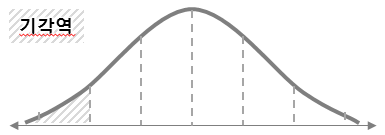

In [8]:
Image("단측검정.png")

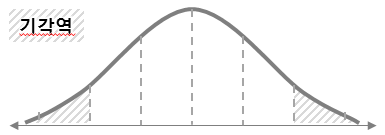

In [9]:
Image("양측검정.png")

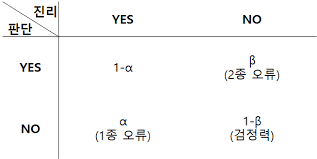

In [10]:
Image("검정오류.png")

## 가설검정에서의 두 가지 오류

#### · 제 1종오류 : 귀무가설이 옳을 때, 귀무가설을 기각하는 오류(α)
- 감자튀김의 예에서 실제 평균이 130g인데도 평균은 130g보다 작다. 라는 결론을 내리는 것. 
- '위험률' 이라고도 부르고, 유의수준과 일치하는 값이므로 분석가가 제어할 수 있는 오류.

#### · 제 2종오류 : 대립가설이 옳을 때, 귀무가설을 채택하는 오류(β)
- 감자튀김의 예에서 실제 평균이 모평균인 130g보다 작은데도, 모평균이 130g보다 적다는 결론을 얻을 수 없는 상황.
- '검정력' 이라고 부르며, β값은 알 수 없는 모집단의 정보이기 때문에 분석가가 제어할 수 없는 오류.

In [11]:
rv = stats.norm(130, 3)

In [12]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples

0.053

In [13]:
rv = stats.norm(128, 3) #학생이 모집단에 관한 정보 β를 입수해(감자튀김의 평균은 128g) β값 산출 가능

In [14]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
        
cnt / n_samples

0.197